In [2]:
import numpy as np
from scipy.interpolate import interp1d

In [2]:
waypoints = []
with open('F:\Team_roar\ROAR\ROAR_Sim\data\\berkeley_minor_waypoints.txt', 'r') as f:
    data = f.readlines() 
 
    for line in data:
        odom = line.rstrip().split(',')
        numbers_float = list(map(float, odom))
        #print numbers_float
        waypoints.append(numbers_float)
waypoints = np.array(waypoints)

In [3]:
waypoints

array([[-8.09358032e+02,  7.52343597e+01, -6.89728516e+02],
       [-8.09076233e+02,  7.52240829e+01, -6.89728516e+02],
       [-8.08260620e+02,  7.51929779e+01, -6.89728577e+02],
       [-8.07147278e+02,  7.51507034e+01, -6.89728577e+02],
       [-8.05742004e+02,  7.50974121e+01, -6.89728638e+02],
       [-8.02822876e+02,  7.49861603e+01, -6.89728760e+02],
       [-7.97173828e+02,  7.47711105e+01, -6.89727661e+02],
       [-7.88507690e+02,  7.44395981e+01, -6.89722168e+02],
       [-7.75615479e+02,  7.39448471e+01, -6.89716675e+02],
       [-7.60724854e+02,  7.33715515e+01, -6.89709839e+02],
       [-7.40757141e+02,  7.26004639e+01, -6.89698425e+02],
       [-7.18803894e+02,  7.17504349e+01, -6.89687622e+02],
       [-6.93859802e+02,  7.07823410e+01, -6.89674133e+02],
       [-6.65541443e+02,  6.96809921e+01, -6.89657593e+02],
       [-6.35072876e+02,  6.84837265e+01, -6.88035034e+02],
       [-6.04577576e+02,  6.69469986e+01, -6.84999695e+02],
       [-5.70567993e+02,  6.52376709e+01

In [19]:
wptsx=waypoints[:,0]  
wptsy=waypoints[:,1]  
wptsz=waypoints[:,2]  


# get x column

x = np.arange(0, len(waypoints)).T

In [20]:
fx = interp1d(x, wptsx, kind='cubic')
fy = interp1d(x, wptsy, kind='cubic')
fz = interp1d(x, wptsz, kind='cubic')

In [29]:
xnew = np.arange(0, len(waypoints)-1,.05)

In [30]:
intrpx=fx(xnew)
intrpy=fy(xnew)
intrpz=fz(xnew)

In [31]:
import matplotlib.pyplot as plt

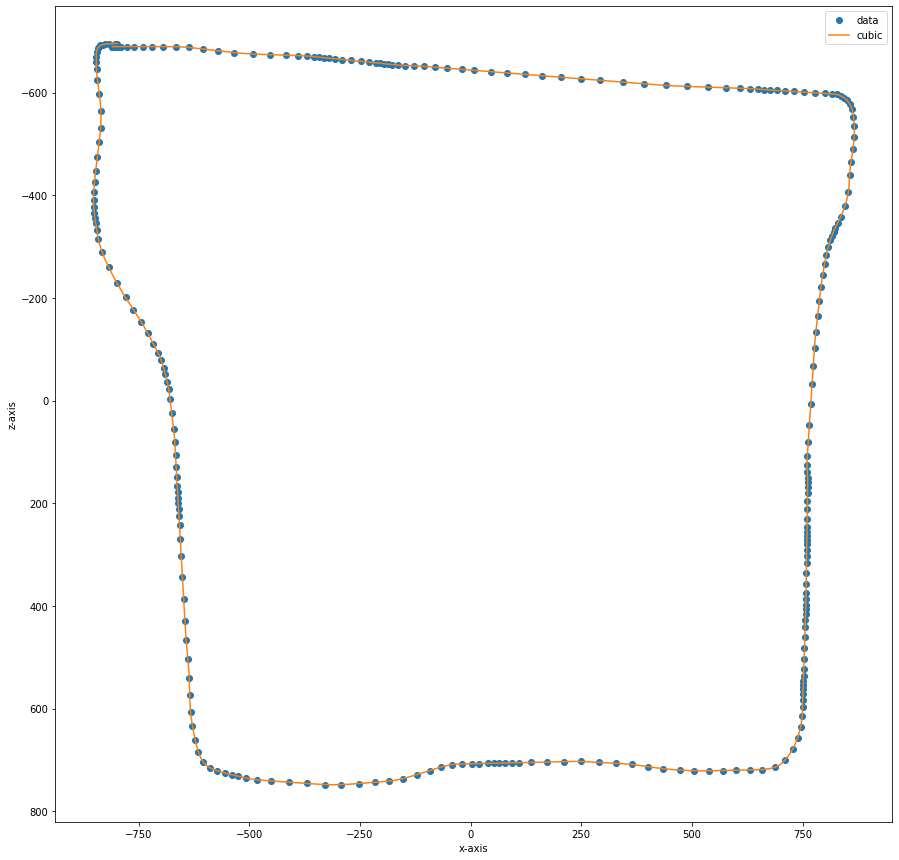

In [32]:
plt.figure(figsize=(15,15))
plt.gca().invert_yaxis()
plt.plot(wptsx,wptsz,'o',intrpx,intrpz,'-' )
plt.gca().invert_yaxis()
plt.xlabel("x-axis")
plt.ylabel("z-axis")


plt.legend(['data', 'cubic'], loc='best')
plt.gca().invert_yaxis()
plt.show()

In [3]:
newpoints = np.loadtxt('F:\Team_roar\ROAR\ROAR_Sim\data\\berkeley_minor_int01_waypoints.txt', delimiter=',')

In [49]:
dist = []
for i in range(len(newpoints) - 1):
    dist.append(np.linalg.norm(newpoints[i+1] - newpoints[i]))

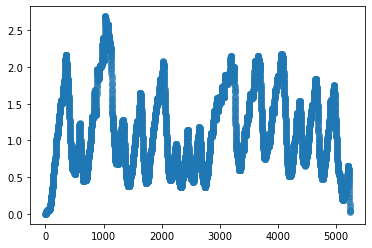

In [44]:
X = np.arange(len(dist))
plt.scatter(X, dist, alpha=0.6)  # 绘制散点图，透明度为0.6（这样颜色浅一点，比较好看）
plt.show()

In [47]:
np.mean(dist)

1.1092157412896757

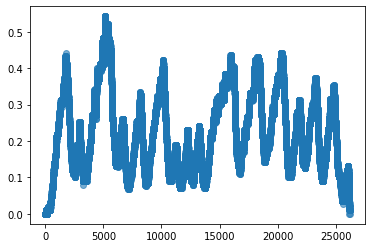

In [50]:
X = np.arange(len(dist))
plt.scatter(X, dist, alpha=0.6)  # 绘制散点图，透明度为0.6（这样颜色浅一点，比较好看）
plt.show()

In [51]:
np.mean(dist)

0.2218920396166473

In [12]:
same_dis = [list(newpoints[0])]
cur = newpoints[0]
for i in range(1, len(newpoints)):
    if np.linalg.norm(newpoints[i] - cur) >= 1:
        same_dis.append(list(newpoints[i]))
        cur = newpoints[i]

In [15]:
res = np.array(same_dis)

In [16]:
np.savetxt('F:\Team_roar\ROAR\ROAR_Sim\data\\berkeley_minor_samedistance_waypoints.txt', newpoints, delimiter=',')